# Data Cleaning Project

In [90]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [91]:
df = pd.read_csv('joblisting.csv')
df.head()

,Unnamed: 0,company,job title,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description
0,0,Walmart\n3.4,Data Scientist,"Sunnyvale, CA",-1,Job Type : N/A,10000+ employees,1994,company - public,general merchandise & superstores,retail,$10+ billion (usd),Position Summary...\nWhat you'll do...\nAnalyt...
1,1,TikTok\n3.8,Data Scientist,"Mountain View, CA",-1,Job Type : Full-time,501 to 1000 employees,2016,company - private,internet,information technology,unknown / non-applicable,TikTok is the leading destination for short-fo...
2,2,Indeed\n4.3,Principal Data Scientist - Candidate Recommend...,"San Francisco, CA",Employer Provided Salary:$187K - $231K,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Candidate Recommendations team b...
3,3,Indeed\n4.3,Senior Data Scientist - Moderation Engineering,"San Francisco, CA",Employer Provided Salary:$130K - $156K,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Moderation Engineering team’s mi...
4,4,Thermo Fisher - America\n3.8,Data Scientist III,"San Francisco, CA",-1,Job Type : N/A,10000+ employees,1902,company - public,biotech & pharmaceuticals,biotech & pharmaceuticals,$10+ billion (usd),Thermo Fisher Scientific Inc. is the world lea...


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2573 non-null   int64 
 1   company          2573 non-null   object
 2   job title        2573 non-null   object
 3   headquarters     2573 non-null   object
 4   salary estimate  2573 non-null   object
 5   job type         2573 non-null   object
 6   size             2573 non-null   object
 7   founded          2573 non-null   int64 
 8   type             2573 non-null   object
 9   industry         2573 non-null   object
 10  sector           2573 non-null   object
 11  revenue          2573 non-null   object
 12  job description  2573 non-null   object
dtypes: int64(2), object(11)
memory usage: 261.4+ KB


In [93]:
df.rename(columns={'Unnamed: 0' : 'index'}, inplace=True)

downcast id column to int16, assuming the dataset are large, making int16 make the dataset lighter:

In [94]:
df['index'] = df['index'].astype('Int16')

split company name and rating from company column:

In [95]:
df['rating'] = df['company'].str.extract(r'(\d+\.?\d*)').astype(float)

keep only company name and remove any unnecessary symbols in company column:

In [96]:
df['company'].str.replace(r'[a-zA-Z0-9 ]', '', regex=True).value_counts()

company
\n.        1933
            275
.\n.         84
-\n.         70
,.\n.        66
,.           31
,\n.         18
-,.\n.       14
&\n.         13
&.\n.        12
.            12
()           10
'             8
...           5
'\n.          5
..,.\n.       4
,             3
™             3
.,\n.         3
,()           2
/             1
-             1
Name: count, dtype: int64

keep only company name with no symbols:

In [97]:
df['company'] = df['company'].str.split('\n').str[0]

In [98]:
df['company'] = (df['company'].str.replace(r'[^\w\s]', '', regex=True).str.strip())

cleaning job title column:

In [99]:
df['job title'].value_counts()

job title
Data Scientist                                                       226
Machine Learning Engineer                                            153
Senior Data Scientist                                                139
Data Analyst                                                          50
Machine Learning Scientist                                            35
                                                                    ... 
Machine Learning Engineer Lead                                         1
Senior Clinical Data Scientist/Statistical Programmer                  1
Data Scientist - Biotech                                               1
Research Scientist - Multi-View Machine Learning and Segmentation      1
Senior Applied Research Scientist, Computer Vision                     1
Name: count, Length: 892, dtype: int64

In [100]:
df[df['job title'].str.contains('Data Scientist' , na=False, case=False)]

,index,company,job title,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description,rating
0,0,Walmart,Data Scientist,"Sunnyvale, CA",-1,Job Type : N/A,10000+ employees,1994,company - public,general merchandise & superstores,retail,$10+ billion (usd),Position Summary...\nWhat you'll do...\nAnalyt...,3.4
1,1,TikTok,Data Scientist,"Mountain View, CA",-1,Job Type : Full-time,501 to 1000 employees,2016,company - private,internet,information technology,unknown / non-applicable,TikTok is the leading destination for short-fo...,3.8
2,2,Indeed,Principal Data Scientist - Candidate Recommend...,"San Francisco, CA",Employer Provided Salary:$187K - $231K,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Candidate Recommendations team b...,4.3
3,3,Indeed,Senior Data Scientist - Moderation Engineering,"San Francisco, CA",Employer Provided Salary:$130K - $156K,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Moderation Engineering team’s mi...,4.3
4,4,Thermo Fisher America,Data Scientist III,"San Francisco, CA",-1,Job Type : N/A,10000+ employees,1902,company - public,biotech & pharmaceuticals,biotech & pharmaceuticals,$10+ billion (usd),Thermo Fisher Scientific Inc. is the world lea...,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2551,Plum Lending,Senior Data Scientist,"San Francisco, CA",$89K - $157K (Glassdoor est.),Job Type : Full-time,1 to 50 employees,2014,company - private,lending,finance,unknown / non-applicable,Plum is looking for an exceptional Senior Data...,4.1
2552,2552,NVIDIA,Senior Data Scientist,"Santa Clara, CA",$134K - $218K (Glassdoor est.),Job Type : Full-time,10000+ employees,1993,company - public,computer hardware & software,information technology,$5 to $10 billion (usd),We are looking for a Machine Learning Engineer...,4.7
2554,2554,Walmart,Senior Data Scientist - Walmart Connect,"San Bruno, CA",$117K - $193K (Glassdoor est.),Job Type : Full-time,10000+ employees,1994,company - public,general merchandise & superstores,retail,$10+ billion (usd),Position Summary...\nWhat you'll do...\nWe are...,3.4
2563,2563,Rivian Automotive,Senior Supplier and Manufacturing Reliability ...,"Palo Alto, CA",$170K - $182K (Glassdoor est.),Job Type : Full-time,1001 to 5000 employees,2009,company - private,transportation equipment manufacturing,manufacturing,unknown / non-applicable,"at Rivian Automotive\nUnited States, Californi...",4.3


i asked chatGPT to help me here and explain what i want exactly(unification job titles).

In [101]:
def unify_job_title(title):
    title = title.lower()

    if 'data scientist' in title:
        return 'Data Scientist'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'business analyst' in title:
        return 'Business Analyst'
    elif 'machine learning' in title:
        return 'Machine Learning Engineer'
    elif 'research scientist' in title:
        return 'Research Scientist'
    elif 'ai engineer' in title or 'artificial intelligence' in title:
        return 'AI Engineer'
    elif 'deep learning' in title:
        return 'Deep Learning Engineer'
    elif 'nlp' in title or 'natural language' in title:
        return 'NLP Engineer'
    elif 'computer vision' in title:
        return 'Computer Vision Engineer'
    elif 'statistician' in title:
        return 'Statistician'
    elif 'engineer' in title:
        return 'Data Engineer'
    elif 'analytics' in title:
        return 'Analytics Specialist'
    else:
        return 'Other'

df['job title'] = df['job title'].apply(unify_job_title)

In [102]:
df['job title'].value_counts().head(50)

job title
Data Scientist               1207
Other                         504
Machine Learning Engineer     367
Data Analyst                  220
Data Engineer                 161
Research Scientist             76
Analytics Specialist           30
NLP Engineer                    4
Deep Learning Engineer          2
AI Engineer                     1
Computer Vision Engineer        1
Name: count, dtype: int64

i noticed that every ['headquarters'] has CA state name, so i search the other way around(anything except CA):

In [103]:
df[~df['headquarters'].str.contains('CA') & ~df['headquarters'].str.contains('United States')]

,index,company,job title,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description,rating
158,158,Intuit Data,Other,Senior Data Scientist,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nIntuit is looking for innovative and...,4.5
159,159,Intuit Data,Other,Staff Data Scientist,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nIntuit is looking for innovative and...,4.5
296,296,Intuit Data,Other,Business Data Analyst,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),"Overview\nIntuit’s Small Business Group (SBG),...",4.5
464,464,Intuit Data,Other,Business Data Analyst,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),"Overview\nIntuit’s Small Business Group (SBG),...",4.5
617,617,Intuit Data,Other,Staff Business Data Analysis,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nCome join Intuit as a Staff Business...,4.5
783,783,Instacart Corporate,Other,Economist - Machine Learning Engineer,"San Francisco, CA",Job Type : Full-time,1001 to 5000 employees,2012,company - private,internet,information technology,unknown / non-applicable,We're transforming the grocery industry\n\nIns...,3.8
790,790,Intuit Data,Other,Manager 3 Data and Analytics,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nCome join Intuit as a Group Manager ...,4.5
824,824,Intuit Data,Other,Principal Data Scientist,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nOur formula for innovation begins wi...,4.5
834,834,Intuit Data,Other,Senior Data Scientist,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nIntuit is looking for innovative and...,4.5
1055,1055,Intuit Data,Other,Staff Business Data Analysis,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nCome join Intuit as a Staff Business...,4.5


i moved some values that is not in the proper column:

In [104]:
mask_head = ~df['headquarters'].str.contains('CA', na=False) & ~df['headquarters'].str.contains('United States', na=False)
df.loc[mask_head, 'job title'] = df.loc[mask_head, 'headquarters']

trying to find the wrong values:

In [105]:
df['headquarters'].unique()

array(['Sunnyvale, CA', 'Mountain View, CA', 'San Francisco, CA',
       'United States', 'Sacramento, CA', 'San Jose, CA', 'Livermore, CA',
       'Palo Alto, CA', 'Santa Clara, CA', 'Oakland, CA', 'San Mateo, CA',
       'Los Altos, CA', 'Menlo Park, CA', 'Milpitas, CA',
       'Foster City, CA', 'Morgan Hill, CA', 'Newark, CA',
       'South San Francisco, CA', 'Hayward, CA', 'San Carlos, CA',
       'Fremont, CA', 'Los Gatos, CA', 'Senior Data Scientist',
       'Staff Data Scientist', 'Redwood City, CA', 'Cupertino, CA',
       'Burlingame, CA', 'Emeryville, CA', 'Pleasanton, CA',
       'Half Moon Bay, CA', 'Sausalito, CA', 'Brisbane, CA',
       'Elk Grove, CA', 'Business Data Analyst', 'Pittsburg, CA',
       'Concord, CA', 'East Palo Alto, CA', 'Patterson, CA',
       'Berkeley, CA', 'San Bruno, CA', 'Hercules, CA', 'San Ramon, CA',
       'San Leandro, CA', 'Staff Business Data Analysis',
       'Economist - Machine Learning Engineer',
       'Manager 3 Data and Analytics', '

salary estimate has the same ['headquarters'] problem:

In [106]:
df[df['salary estimate'].str.contains('CA')]

,index,company,job title,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description,rating
158,158,Intuit Data,Senior Data Scientist,Senior Data Scientist,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nIntuit is looking for innovative and...,4.5
159,159,Intuit Data,Staff Data Scientist,Staff Data Scientist,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nIntuit is looking for innovative and...,4.5
296,296,Intuit Data,Business Data Analyst,Business Data Analyst,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),"Overview\nIntuit’s Small Business Group (SBG),...",4.5
464,464,Intuit Data,Business Data Analyst,Business Data Analyst,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),"Overview\nIntuit’s Small Business Group (SBG),...",4.5
617,617,Intuit Data,Staff Business Data Analysis,Staff Business Data Analysis,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nCome join Intuit as a Staff Business...,4.5
783,783,Instacart Corporate,Economist - Machine Learning Engineer,Economist - Machine Learning Engineer,"San Francisco, CA",Job Type : Full-time,1001 to 5000 employees,2012,company - private,internet,information technology,unknown / non-applicable,We're transforming the grocery industry\n\nIns...,3.8
790,790,Intuit Data,Manager 3 Data and Analytics,Manager 3 Data and Analytics,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nCome join Intuit as a Group Manager ...,4.5
824,824,Intuit Data,Principal Data Scientist,Principal Data Scientist,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nOur formula for innovation begins wi...,4.5
834,834,Intuit Data,Senior Data Scientist,Senior Data Scientist,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nIntuit is looking for innovative and...,4.5
1055,1055,Intuit Data,Staff Business Data Analysis,Staff Business Data Analysis,"Mountain View, CA",Job Type : Full-time,5001 to 10000 employees,1983,company - public,computer hardware & software,information technology,$2 to $5 billion (usd),Overview\nCome join Intuit as a Staff Business...,4.5


to check if there is other typo values:

In [107]:
df['salary estimate'].unique()

array(['-1', 'Employer Provided Salary:$187K - $231K',
       'Employer Provided Salary:$130K - $156K',
       'Employer Provided Salary:$95K - $105K',
       'Employer Provided Salary:$190K',
       'Employer Provided Salary:$120K - $160K',
       'Employer Provided Salary:$115K', '$99K - $170K (Glassdoor est.)',
       '$94K - $169K (Glassdoor est.)', '$108K - $197K (Glassdoor est.)',
       '$91K - $151K (Glassdoor est.)', '$63K - $133K (Glassdoor est.)',
       '$85K - $174K (Glassdoor est.)', '$126K - $222K (Glassdoor est.)',
       '$75K - $162K (Glassdoor est.)', '$85K - $177K (Glassdoor est.)',
       '$82K - $173K (Glassdoor est.)', '$101K - $179K (Glassdoor est.)',
       '$96K - $154K (Glassdoor est.)', '$107K - $186K (Glassdoor est.)',
       '$98K - $198K (Glassdoor est.)', '$100K - $170K (Glassdoor est.)',
       '$71K - $174K (Glassdoor est.)', '$85K - $169K (Glassdoor est.)',
       '$43K - $79K (Glassdoor est.)', '$75K - $157K (Glassdoor est.)',
       '$115K - $163K (

moving the values in what it should be like job title column:

In [108]:
mask_salary = df['salary estimate'].str.contains('CA', na=False)
df.loc[mask_salary, 'headquarters'] = df.loc[mask_salary, 'salary estimate']

remove any text from 'salary estimate' column:

In [109]:
df['salary estimate'] = df['salary estimate'].str.replace('$', '').str.replace('K', '000')
df['salary estimate'] = df['salary estimate'].str.replace((r'[^\d\-]'), '', regex=True)

split the salary column to min and max salaries:

In [110]:
df[['min_salary', 'max_salary']] = df['salary estimate'].str.split('-', expand=True)

changiing data type:

In [111]:
df['min_salary'] = pd.to_numeric(df['min_salary'], errors='coerce')
df['max_salary'] = pd.to_numeric(df['max_salary'], errors='coerce')

convert -1 to na values:

In [112]:
for col in ['min_salary', 'max_salary']:
    df.loc[df[col] < 2, col] = np.nan

In [113]:
df.head()

,index,company,job title,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description,rating,min_salary,max_salary
0,0,Walmart,Data Scientist,"Sunnyvale, CA",-1,Job Type : N/A,10000+ employees,1994,company - public,general merchandise & superstores,retail,$10+ billion (usd),Position Summary...\nWhat you'll do...\nAnalyt...,3.4,NaN,NaN
1,1,TikTok,Data Scientist,"Mountain View, CA",-1,Job Type : Full-time,501 to 1000 employees,2016,company - private,internet,information technology,unknown / non-applicable,TikTok is the leading destination for short-fo...,3.8,NaN,NaN
2,2,Indeed,Data Scientist,"San Francisco, CA",187000-231000,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Candidate Recommendations team b...,4.3,187000.0,231000.0
3,3,Indeed,Data Scientist,"San Francisco, CA",130000-156000,Job Type : Full-time,10000+ employees,2004,company - private,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Moderation Engineering team’s mi...,4.3,130000.0,156000.0
4,4,Thermo Fisher America,Data Scientist,"San Francisco, CA",-1,Job Type : N/A,10000+ employees,1902,company - public,biotech & pharmaceuticals,biotech & pharmaceuticals,$10+ billion (usd),Thermo Fisher Scientific Inc. is the world lea...,3.8,NaN,NaN


In [114]:
df['job type'].unique()

array(['Job Type : N/A', 'Job Type : Full-time', 'Job Type : Part-time',
       'Job Type : Contract', 'Job Type : Internship',
       'Job Type : Temporary'], dtype=object)

In [115]:
df['job type'].value_counts()

job type
Job Type : Full-time     2445
Job Type : Part-time       51
Job Type : N/A             50
Job Type : Contract        15
Job Type : Internship      10
Job Type : Temporary        2
Name: count, dtype: int64

remove (Job Type:) text in job type column:

In [116]:
df['job type'] = df['job type'].str.replace('Job Type : ', '')
df['job type'] = df['job type'].replace('N/A', np.nan)

standardize text:

In [117]:
df['job title'] = df['job title'].str.strip().str.lower()
df['job type'] = df['job type'].str.strip().str.lower()

In [118]:
df['size'].value_counts()

size
10000+ employees           681
1 to 50 employees          414
51 to 200 employees        347
1001 to 5000 employees     236
-1                         216
201 to 500 employees       211
501 to 1000 employees      198
5001 to 10000 employees    188
unknown                     82
Name: count, dtype: int64

making -1 and unknown = null: 

In [119]:
df['size'] = df['size'].replace(['-1', 'unknown'], np.nan)

removing employees from size column no need for it:

In [120]:
df['size'] = df['size'].str.replace(' employees', '')

In [121]:
df['type'].value_counts()

type
company - public                  1076
company - private                 1034
-1                                 216
subsidiary or business segment      67
nonprofit organization              57
college / university                37
unknown                             32
government                          16
contract                            16
self-employed                        9
private practice / firm              6
hospital                             6
school / school district             1
Name: count, dtype: int64

making -1 and unknown = null: 

In [122]:
df['type'] = df['type'].replace(['-1', 'unknown'], np.nan)

remove extra spaces:

In [123]:
df['type'] = df['type'].str.strip()

sort the type fot what suit best, and rewrite the types:

In [124]:
type_map = {
    'company - public' : 'public company',
    'company - private' : 'private company',
    'subsidiary or business segment' : 'subsidiary',
    'nonprofit organization': 'nonprofit',
    'college / university' : 'education',
    'school / school district': 'education',
    'government': 'government',
    'contract' : 'contractor',
    'self-employed': 'self-employed',
    'private practice / firm' : 'private firm',
    'hospital' : 'healthcare'
}
df['type'] = df['type'].map(type_map)

In [125]:
df.head()

,index,company,job title,headquarters,salary estimate,job type,size,founded,type,industry,sector,revenue,job description,rating,min_salary,max_salary
0,0,Walmart,data scientist,"Sunnyvale, CA",-1,NaN,10000+,1994,public company,general merchandise & superstores,retail,$10+ billion (usd),Position Summary...\nWhat you'll do...\nAnalyt...,3.4,NaN,NaN
1,1,TikTok,data scientist,"Mountain View, CA",-1,full-time,501 to 1000,2016,private company,internet,information technology,unknown / non-applicable,TikTok is the leading destination for short-fo...,3.8,NaN,NaN
2,2,Indeed,data scientist,"San Francisco, CA",187000-231000,full-time,10000+,2004,private company,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Candidate Recommendations team b...,4.3,187000.0,231000.0
3,3,Indeed,data scientist,"San Francisco, CA",130000-156000,full-time,10000+,2004,private company,internet,information technology,$2 to $5 billion (usd),Your Job\nThe Moderation Engineering team’s mi...,4.3,130000.0,156000.0
4,4,Thermo Fisher America,data scientist,"San Francisco, CA",-1,NaN,10000+,1902,public company,biotech & pharmaceuticals,biotech & pharmaceuticals,$10+ billion (usd),Thermo Fisher Scientific Inc. is the world lea...,3.8,NaN,NaN


In [126]:
df['sector'].unique()

array(['retail', 'information technology', 'biotech & pharmaceuticals',
       '-1', 'finance', 'government', 'health care', 'insurance',
       'business services', 'manufacturing', 'media', 'non-profit',
       'oil, gas, energy & utilities', 'travel & tourism',
       'accounting & legal', 'arts, entertainment & recreation',
       'real estate', 'telecommunications', 'education',
       'transportation & logistics', 'agriculture & forestry',
       'construction, repair & maintenance',
       'restaurants, bars & food services'], dtype=object)

making -1 and unknown = null: 

In [127]:
df['sector'] = df['sector'].replace('-1', np.nan)

In [128]:
df['revenue'].unique()

array(['$10+ billion (usd)', 'unknown / non-applicable',
       '$2 to $5 billion (usd)', '-1', '$1 to $2 billion (usd)',
       '$500 million to $1 billion (usd)', '$25 to $50 million (usd)',
       '$5 to $10 billion (usd)', '$50 to $100 million (usd)',
       'less than $1 million (usd)', '$100 to $500 million (usd)',
       '$10 to $25 million (usd)', '$5 to $10 million (usd)',
       '$1 to $5 million (usd)'], dtype=object)

making -1 and unknown = null: 

In [129]:
df['revenue'] = df['revenue'].replace(['-1', 'unknown / non-applicable'], np.nan)

remove the usd first, then replacing billion to B, and million to M:

In [130]:
df['revenue'] = df['revenue'].str.replace('(usd)', '')

In [131]:
df['revenue'] = df['revenue'].str.replace('$', '').str.replace('billion', 'B').str.replace('million','M')
df['revenue'] = df['revenue'].str.replace(' B', 'B').str.replace(' M', 'M').str.replace('+B', 'B+')

drop unwanted columns:

In [132]:
df.drop(columns=['salary estimate', 'industry', 'job description'], inplace=True)

In [133]:
df.head()

,index,company,job title,headquarters,job type,size,founded,type,sector,revenue,rating,min_salary,max_salary
0,0,Walmart,data scientist,"Sunnyvale, CA",NaN,10000+,1994,public company,retail,10B+,3.4,NaN,NaN
1,1,TikTok,data scientist,"Mountain View, CA",full-time,501 to 1000,2016,private company,information technology,NaN,3.8,NaN,NaN
2,2,Indeed,data scientist,"San Francisco, CA",full-time,10000+,2004,private company,information technology,2 to 5B,4.3,187000.0,231000.0
3,3,Indeed,data scientist,"San Francisco, CA",full-time,10000+,2004,private company,information technology,2 to 5B,4.3,130000.0,156000.0
4,4,Thermo Fisher America,data scientist,"San Francisco, CA",NaN,10000+,1902,public company,biotech & pharmaceuticals,10B+,3.8,NaN,NaN


create average salary column, with a help of chatGPT:

In [134]:
def calculate_avg(row):
    if pd.isnull(row['min_salary']) or pd.isnull(row['max_salary']):
        return row['min_salary'] if pd.notnull(row['min_salary']) else row['max_salary']
    # If either salary value is missing (NaN), return the one that is available
    if row['min_salary'] > 0 and row['max_salary'] > 0:
        return (row['min_salary'] + row['max_salary']) / 2
    elif row['max_salary'] == 0:
        return row['min_salary']
    elif row['min_salary'] == 0:
        return row['max_salary']
    return 0 

df['average_salary'] = df.apply(calculate_avg, axis=1)

some values in hours, multiplite with 2080 which is converted from houly to yearly number:

In [135]:
df.loc[df['average_salary'] < 500, 'average_salary'] *= 2080

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           2573 non-null   Int16  
 1   company         2573 non-null   object 
 2   job title       2573 non-null   object 
 3   headquarters    2573 non-null   object 
 4   job type        2523 non-null   object 
 5   size            2275 non-null   object 
 6   founded         2573 non-null   int64  
 7   type            2325 non-null   object 
 8   sector          2067 non-null   object 
 9   revenue         1367 non-null   object 
 10  rating          2232 non-null   float64
 11  min_salary      2095 non-null   float64
 12  max_salary      2093 non-null   float64
 13  average_salary  2095 non-null   float64
dtypes: Int16(1), float64(4), int64(1), object(8)
memory usage: 269.0+ KB


In [137]:
df.head()

,index,company,job title,headquarters,job type,size,founded,type,sector,revenue,rating,min_salary,max_salary,average_salary
0,0,Walmart,data scientist,"Sunnyvale, CA",NaN,10000+,1994,public company,retail,10B+,3.4,NaN,NaN,NaN
1,1,TikTok,data scientist,"Mountain View, CA",full-time,501 to 1000,2016,private company,information technology,NaN,3.8,NaN,NaN,NaN
2,2,Indeed,data scientist,"San Francisco, CA",full-time,10000+,2004,private company,information technology,2 to 5B,4.3,187000.0,231000.0,209000.0
3,3,Indeed,data scientist,"San Francisco, CA",full-time,10000+,2004,private company,information technology,2 to 5B,4.3,130000.0,156000.0,143000.0
4,4,Thermo Fisher America,data scientist,"San Francisco, CA",NaN,10000+,1902,public company,biotech & pharmaceuticals,10B+,3.8,NaN,NaN,NaN


now i'm going to deal with missing values:

In [138]:
df.isna().sum()

index                0
company              0
job title            0
headquarters         0
job type            50
size               298
founded              0
type               248
sector             506
revenue           1206
rating             341
min_salary         478
max_salary         480
average_salary     478
dtype: int64

In [139]:
df['job type'].value_counts()

job type
full-time     2445
part-time       51
contract        15
internship      10
temporary        2
Name: count, dtype: int64

In [140]:
df['job type'] = df['job type'].fillna(df['job type'].mode()[0])

In [141]:
df['size'].value_counts()

size
10000+           681
1 to 50          414
51 to 200        347
1001 to 5000     236
201 to 500       211
501 to 1000      198
5001 to 10000    188
Name: count, dtype: int64

results are close, i will fill the null to unknown to aviod biasing:

In [142]:
df['size'] = df['size'].fillna('unknown')

In [143]:
df['type'].value_counts()

type
public company     1076
private company    1034
subsidiary           67
nonprofit            57
education            38
government           16
contractor           16
self-employed         9
private firm          6
healthcare            6
Name: count, dtype: int64

since public comapy and private are close, i will fill the null to unknown to aviod biasing:

In [144]:
df['type'] = df['type'].fillna('unknown')

filling revenue nulls as unknown:

In [145]:
df['revenue'] = df['revenue'].fillna('unknown')

In [146]:
df['sector'].value_counts()

sector
information technology                1032
business services                      234
biotech & pharmaceuticals              222
finance                                111
retail                                 109
manufacturing                           64
health care                             63
education                               48
insurance                               44
oil, gas, energy & utilities            27
non-profit                              24
media                                   22
government                              18
transportation & logistics              12
real estate                              9
accounting & legal                       8
telecommunications                       6
agriculture & forestry                   4
restaurants, bars & food services        4
construction, repair & maintenance       3
arts, entertainment & recreation         2
travel & tourism                         1
Name: count, dtype: int64

In [147]:
506 / 2573 

0.19665759813447337

20% missing values so i will stick with unknown:

In [148]:
df['sector'] = df['sector'].fillna('unknown')

In [149]:
df['revenue'].value_counts()

revenue
unknown          1206
10B+              550
2 to 5B           142
100 to 500M       126
1 to 2B            94
less than 1M       88
25 to 50M          85
5 to 10B           76
50 to 100M         54
1 to 5M            52
10 to 25M          46
500M to 1B         33
5 to 10M           21
Name: count, dtype: int64

fill the ratings with mean:

In [150]:
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [151]:
df['average_salary'] = df['average_salary'].fillna(df['average_salary'].median())

In [152]:
df.head()

,index,company,job title,headquarters,job type,size,founded,type,sector,revenue,rating,min_salary,max_salary,average_salary
0,0,Walmart,data scientist,"Sunnyvale, CA",full-time,10000+,1994,public company,retail,10B+,3.4,NaN,NaN,133000.0
1,1,TikTok,data scientist,"Mountain View, CA",full-time,501 to 1000,2016,private company,information technology,unknown,3.8,NaN,NaN,133000.0
2,2,Indeed,data scientist,"San Francisco, CA",full-time,10000+,2004,private company,information technology,2 to 5B,4.3,187000.0,231000.0,209000.0
3,3,Indeed,data scientist,"San Francisco, CA",full-time,10000+,2004,private company,information technology,2 to 5B,4.3,130000.0,156000.0,143000.0
4,4,Thermo Fisher America,data scientist,"San Francisco, CA",full-time,10000+,1902,public company,biotech & pharmaceuticals,10B+,3.8,NaN,NaN,133000.0


no need for min and max salary columns:

In [153]:
df.drop(columns=['min_salary', 'max_salary'], inplace=True)

outliers detection:

In [154]:
df.columns

Index(['index', 'company', 'job title', 'headquarters', 'job type', 'size',
       'founded', 'type', 'sector', 'revenue', 'rating', 'average_salary'],
      dtype='object')

In [155]:
df_num = df[['founded',  'rating', 'average_salary']]

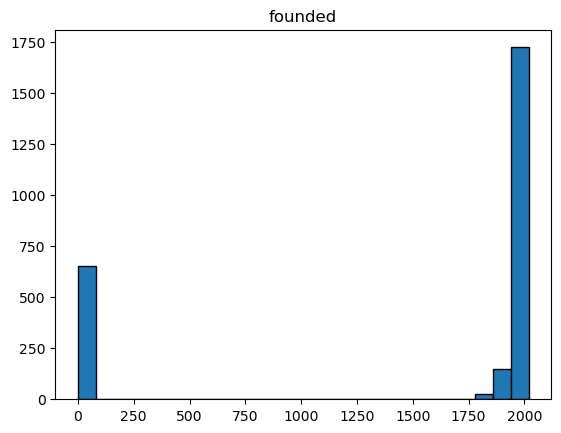

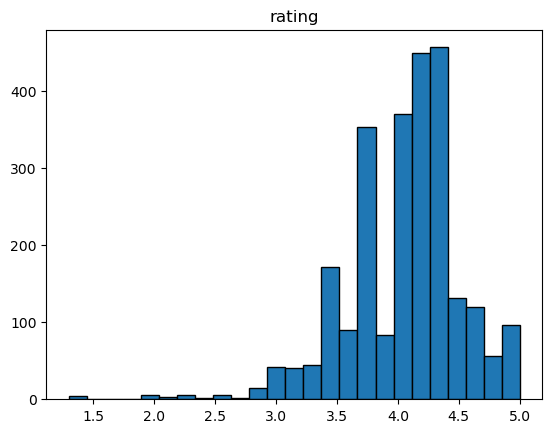

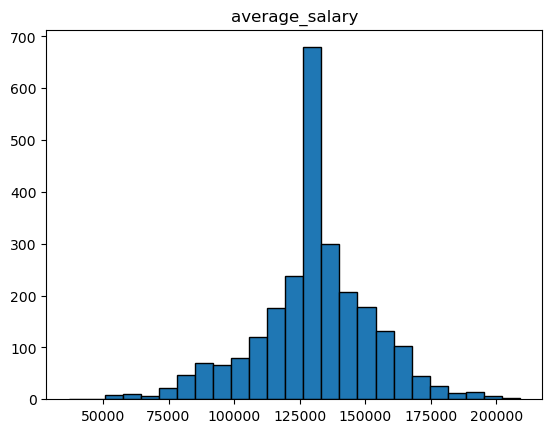

In [158]:
for i in df_num.columns:
    plt.hist(df[i], bins=25, edgecolor = 'black')
    plt.title(i)
    plt.show()

from this histogram i found some values has ratings above 5, the rating are from 1 to 5, any values above 5 will be removed:

In [157]:
df = df[df['rating'] <= 5]